In [18]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('mode.chained_assignment', 'warn') # SettingWithCopyWarning

In [9]:
def make_df(data):
    df = pd.read_csv(data, encoding = 'cp949')
    
    df_col_filter = df[df['인구현황별(1)'] == '인구밀도 (명/㎢)']
    
    df_col_filter.rename(columns = {'행정구역별(1)':'행정구역','행정구역별(2)':'지역명','2019':'인구밀도'}, inplace = True)
    
    columns_to_drop = ['인구현황별(1)', '인구현황별(2)']
    df_col_filter.drop(columns=columns_to_drop, inplace=True)
    
    df_dr = df_col_filter[~df_col_filter['지역명'].str.contains('소계')]
    
    df_gr = df_dr.groupby('행정구역').mean()
    
    return df_gr

In [11]:
base_df = make_df('data 2/성_및_연령별_인구와_인구밀도.csv')

/var/folders/70/_t6jnr7s3_s60h0zhtk312fh0000gn/T/ipykernel_78205/4226911325.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col_filter.rename(columns = {'행정구역별(1)':'행정구역','행정구역별(2)':'지역명','2019':'인구밀도'}, inplace = True)
/var/folders/70/_t6jnr7s3_s60h0zhtk312fh0000gn/T/ipykernel_78205/4226911325.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col_filter.drop(columns=columns_to_drop, inplace=True)


In [70]:
base_df

,행정구역,인구밀도
0,강원도,151.781667
1,경기도,3398.146452
2,경상남도,344.363333
3,경상북도,156.051739
4,광주광역시,3459.944000
5,대구광역시,6432.427500
6,대전광역시,3023.902000
7,부산광역시,9188.216875
8,서울특별시,16841.564000
9,울산광역시,3310.662000


In [38]:
base_df = base_df.reset_index()

In [39]:
base_df

,행정구역,인구밀도
0,강원도,151.781667
1,경기도,3398.146452
2,경상남도,344.363333
3,경상북도,156.051739
4,광주광역시,3459.944000
5,대구광역시,6432.427500
6,대전광역시,3023.902000
7,부산광역시,9188.216875
8,서울특별시,16841.564000
9,울산광역시,3310.662000


In [68]:
def make_gr(df):
    
    plt.style.use('seaborn')
    plt.rcParams['font.family'] = 'AppleGothic'
    plt.figure(figsize=(30, 20))
    plt.xticks(rotation = 90, fontsize = 20)

    sns.barplot(x = '행정구역', y = '인구밀도', data = df)


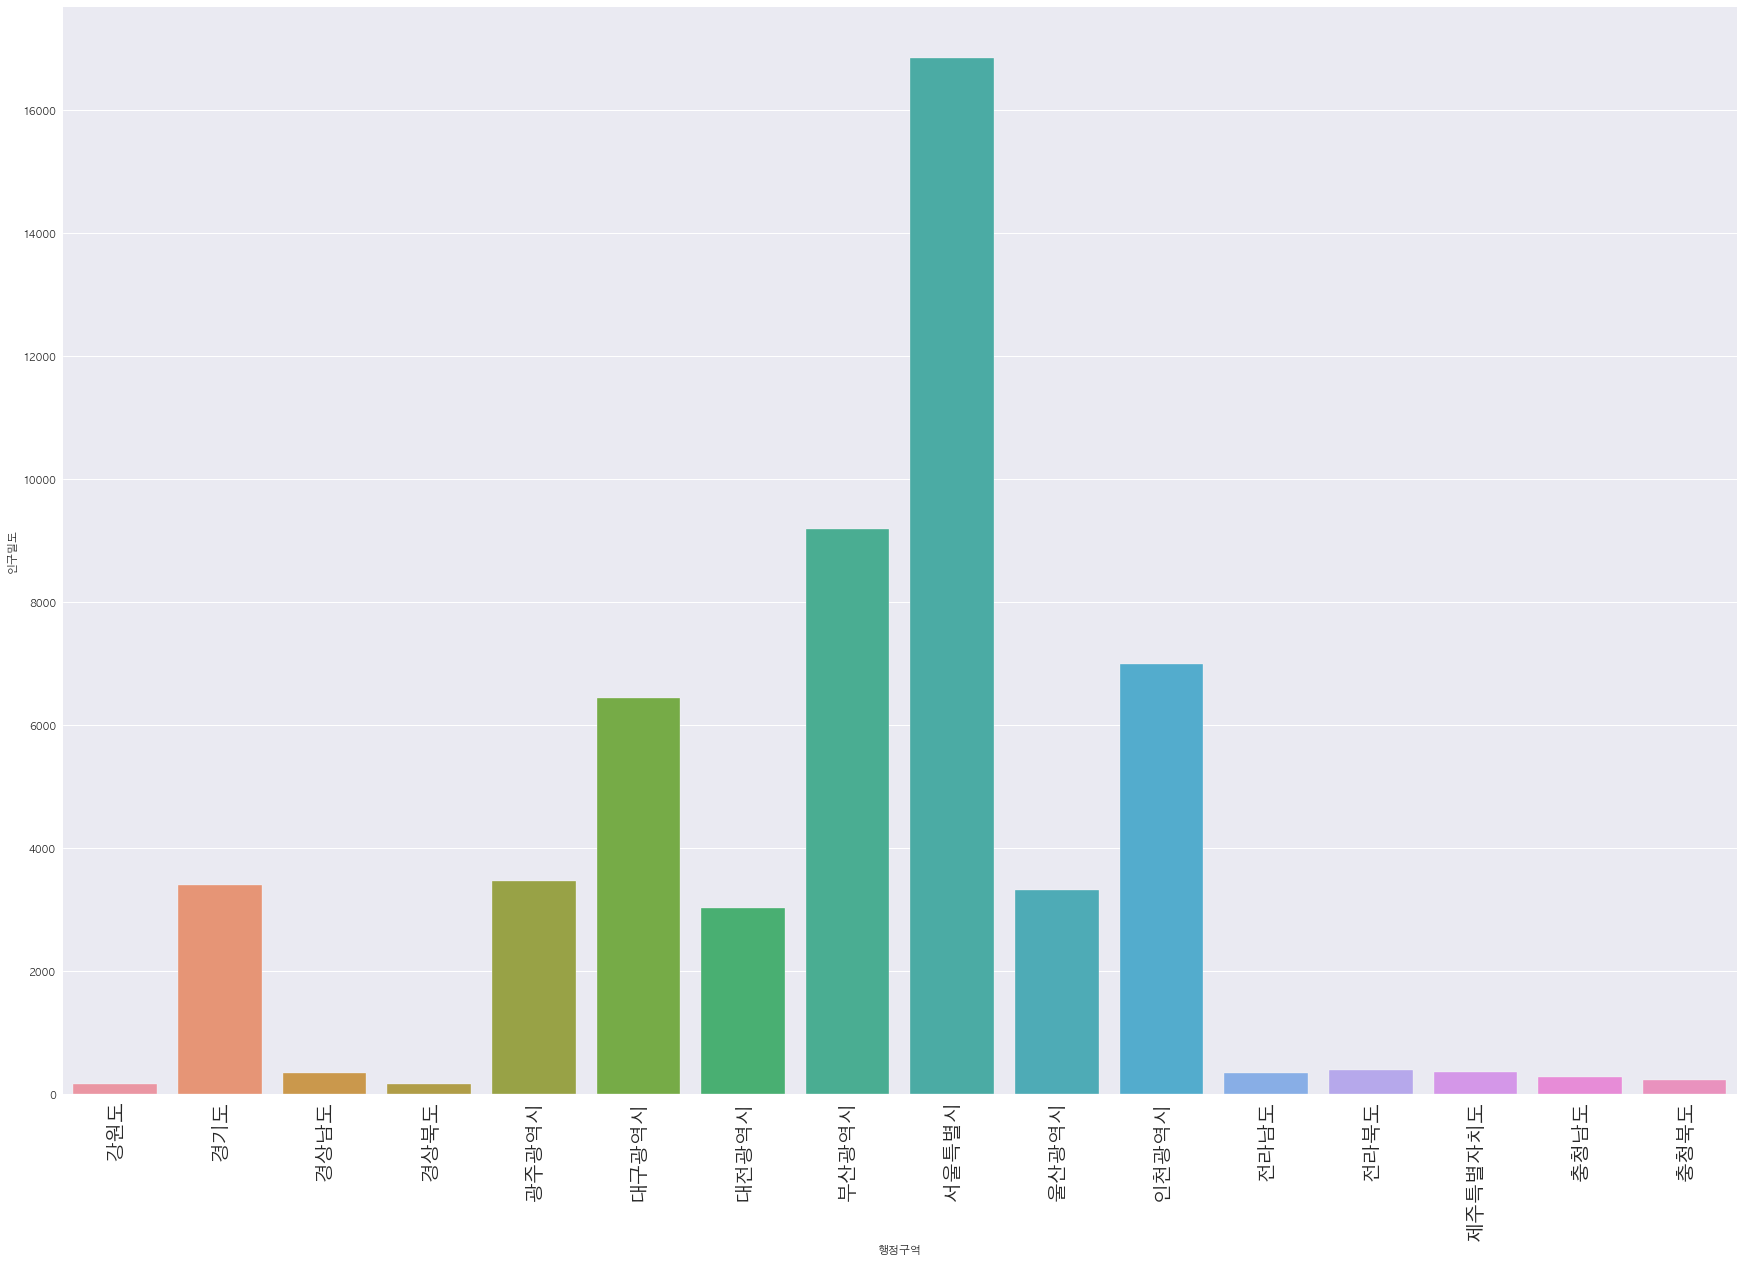

In [69]:
make_gr(base_df)